In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.chdir('E:/Data Science/Competitions/data/JantaHack_HR_Analytics')

import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore',category= DataConversionWarning)
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print(df_train.shape)
print(df_test.shape)

(18359, 14)
(15021, 13)


In [4]:
df_train.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.689,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.923,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.666,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.887,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1


## Analysing Train Data

In [5]:
df_train.describe()

,enrollee_id,city_development_index,training_hours,target
count,18359.000000,18359.000000,18359.000000,18359.000000
mean,16729.360096,0.847140,65.899014,0.132088
std,9643.749725,0.110189,60.885300,0.338595
min,1.000000,0.448000,1.000000,0.000000
25%,8378.500000,0.796000,23.000000,0.000000
50%,16706.000000,0.910000,47.000000,0.000000
75%,25148.500000,0.920000,89.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
df_train.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,18359,14261,18359,18017,17902,15521,18300,13580,13320,17992
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4358,12884,13596,13659,10769,13738,3437,3120,10051,7567


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 14 columns):
enrollee_id               18359 non-null int64
city                      18359 non-null object
city_development_index    18359 non-null float64
gender                    14261 non-null object
relevent_experience       18359 non-null object
enrolled_university       18017 non-null object
education_level           17902 non-null object
major_discipline          15521 non-null object
experience                18300 non-null object
company_size              13580 non-null object
company_type              13320 non-null object
last_new_job              17992 non-null object
training_hours            18359 non-null int64
target                    18359 non-null int64
dtypes: float64(1), int64(3), object(10)
memory usage: 2.0+ MB


In [8]:
cat_col = df_train.select_dtypes(include='object').columns
num_col = df_train.select_dtypes(exclude='object').columns

In [9]:
unique_dict = {i:list(df_train[i].unique()) for i in cat_col[1:]}
print(unique_dict)

{'gender': ['Male', nan, 'Female', 'Other'], 'relevent_experience': ['Has relevent experience', 'No relevent experience'], 'enrolled_university': ['no_enrollment', 'Full time course', 'Part time course', nan], 'education_level': ['Graduate', 'Masters', 'High School', 'Phd', nan, 'Primary School'], 'major_discipline': ['STEM', 'Other', 'No Major', nan, 'Business Degree', 'Arts', 'Humanities'], 'experience': ['3', '14', '6', '8', '>20', '4', '9', '15', '10', '1', '5', '16', '11', '12', '7', '2', '13', '<1', '19', '18', '17', nan, '20'], 'company_size': ['100-500', '<10', '50-99', nan, '5000-9999', '10000+', '1000-4999', '500-999', '10/49'], 'company_type': ['Pvt Ltd', 'Funded Startup', 'Public Sector', nan, 'Early Stage Startup', 'NGO', 'Other'], 'last_new_job': ['1', '2', '3', '>4', 'never', '4', nan]}


In [10]:
df_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4098
relevent_experience          0
enrolled_university        342
education_level            457
major_discipline          2838
experience                  59
company_size              4779
company_type              5039
last_new_job               367
training_hours               0
target                       0
dtype: int64

## Analysing Test Data

In [11]:
df_test.describe()

,enrollee_id,city_development_index,training_hours
count,15021.000000,15021.000000,15021.000000
mean,16643.004327,0.846683,65.158179
std,9626.895233,0.109709,59.719211
min,6.000000,0.448000,1.000000
25%,8316.000000,0.794000,23.000000
50%,16664.000000,0.910000,47.000000
75%,24908.000000,0.920000,89.000000
max,33378.000000,0.949000,336.000000


In [12]:
df_test.describe(include='object')

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,15021,11633,15021,14742,14626,12628,14977,10970,10691,14717
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,3494,10578,11102,11228,8743,11117,2713,2577,8063,6246


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15021 entries, 0 to 15020
Data columns (total 13 columns):
enrollee_id               15021 non-null int64
city                      15021 non-null object
city_development_index    15021 non-null float64
gender                    11633 non-null object
relevent_experience       15021 non-null object
enrolled_university       14742 non-null object
education_level           14626 non-null object
major_discipline          12628 non-null object
experience                14977 non-null object
company_size              10970 non-null object
company_type              10691 non-null object
last_new_job              14717 non-null object
training_hours            15021 non-null int64
dtypes: float64(1), int64(2), object(10)
memory usage: 1.5+ MB


In [14]:
cat_col = df_test.select_dtypes(include='object').columns
num_col = df_test.select_dtypes(exclude='object').columns

unique_dict = {i:list(df_test[i].unique()) for i in cat_col[1:]}
print(unique_dict)

{'gender': [nan, 'Male', 'Female', 'Other'], 'relevent_experience': ['No relevent experience', 'Has relevent experience'], 'enrolled_university': ['Full time course', 'no_enrollment', 'Part time course', nan], 'education_level': ['Graduate', 'Phd', 'High School', 'Masters', nan, 'Primary School'], 'major_discipline': ['STEM', nan, 'Arts', 'Humanities', 'Other', 'No Major', 'Business Degree'], 'experience': ['<1', '>20', '3', '6', '7', '9', '18', '2', '10', '14', '16', '5', '19', '17', '4', '8', '12', '13', '20', '15', '1', '11', nan], 'company_size': ['1000-4999', '50-99', nan, '<10', '100-500', '10000+', '10/49', '5000-9999', '500-999'], 'company_type': ['Public Sector', 'Pvt Ltd', nan, 'NGO', 'Funded Startup', 'Early Stage Startup', 'Other'], 'last_new_job': [nan, '1', '2', '>4', 'never', '4', '3']}


In [15]:
df_test.isnull().sum()


enrollee_id                  0
city                         0
city_development_index       0
gender                    3388
relevent_experience          0
enrolled_university        279
education_level            395
major_discipline          2393
experience                  44
company_size              4051
company_type              4330
last_new_job               304
training_hours               0
dtype: int64

## Inference:

There are a lot of missing values, so missing values need to be treated

## Data Pre-processing
#### Merging both train and test sets
- so that, missing values treatment is done at once

In [16]:
df_train['data'] = 'train'
df_test['data'] = 'test'
df_test['target'] = 0

df = pd.concat([df_train,df_test])

In [17]:
df.head()

,city,city_development_index,company_size,company_type,data,education_level,enrolled_university,enrollee_id,experience,gender,last_new_job,major_discipline,relevent_experience,target,training_hours
0,city_149,0.689,100-500,Pvt Ltd,train,Graduate,no_enrollment,23798,3,Male,1,STEM,Has relevent experience,0,106
1,city_83,0.923,<10,Funded Startup,train,Graduate,no_enrollment,29166,14,Male,1,STEM,Has relevent experience,0,69
2,city_16,0.910,50-99,Public Sector,train,Graduate,no_enrollment,46,6,NaN,2,STEM,Has relevent experience,0,4
3,city_64,0.666,50-99,Pvt Ltd,train,Graduate,no_enrollment,18527,14,Male,1,STEM,Has relevent experience,0,26
4,city_100,0.887,NaN,NaN,train,Masters,no_enrollment,21751,8,NaN,2,STEM,No relevent experience,1,88


In [18]:
df.shape

(33380, 15)

In [19]:
df.isnull().sum()

city                         0
city_development_index       0
company_size              8830
company_type              9369
data                         0
education_level            852
enrolled_university        621
enrollee_id                  0
experience                 103
gender                    7486
last_new_job               671
major_discipline          5231
relevent_experience          0
target                       0
training_hours               0
dtype: int64

In [20]:
cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(exclude='object').columns

unique_dict = {i:list(df[i].unique()) for i in cat_col[1:]}
print(unique_dict)

{'company_size': ['100-500', '<10', '50-99', nan, '5000-9999', '10000+', '1000-4999', '500-999', '10/49'], 'company_type': ['Pvt Ltd', 'Funded Startup', 'Public Sector', nan, 'Early Stage Startup', 'NGO', 'Other'], 'data': ['train', 'test'], 'education_level': ['Graduate', 'Masters', 'High School', 'Phd', nan, 'Primary School'], 'enrolled_university': ['no_enrollment', 'Full time course', 'Part time course', nan], 'experience': ['3', '14', '6', '8', '>20', '4', '9', '15', '10', '1', '5', '16', '11', '12', '7', '2', '13', '<1', '19', '18', '17', nan, '20'], 'gender': ['Male', nan, 'Female', 'Other'], 'last_new_job': ['1', '2', '3', '>4', 'never', '4', nan], 'major_discipline': ['STEM', 'Other', 'No Major', nan, 'Business Degree', 'Arts', 'Humanities'], 'relevent_experience': ['Has relevent experience', 'No relevent experience']}


In [21]:
df.describe(include='object')

,city,company_size,company_type,data,education_level,enrolled_university,experience,gender,last_new_job,major_discipline,relevent_experience
count,33380,24550,24011,33380,32528,32759,33277,25894,32709,28149,33380
unique,123,8,6,2,5,3,22,3,6,6,2
top,city_103,50-99,Pvt Ltd,train,Graduate,no_enrollment,>20,Male,1,STEM,Has relevent experience
freq,7852,5697,18114,18359,19512,24887,6150,23462,13813,24855,24698


In [22]:
df.groupby('company_type')['company_size'].unique()

company_type
Early Stage Startup           [<10, 10/49, 50-99, 100-500, nan, 500-999]
Funded Startup                [<10, 100-500, 10/49, 50-99, 500-999, nan]
NGO                    [1000-4999, 100-500, 10/49, 50-99, 10000+, nan...
Other                  [500-999, 5000-9999, 100-500, nan, 50-99, 1000...
Public Sector          [50-99, 10000+, 100-500, 10/49, 1000-4999, 500...
Pvt Ltd                [100-500, 50-99, 5000-9999, 10000+, <10, 1000-...
Name: company_size, dtype: object

In [23]:
df.loc[df['company_size'].isnull(),'company_type']

4        NaN
15       NaN
19       NaN
22       NaN
26       NaN
        ... 
15011    NaN
15013    NaN
15014    NaN
15019    NaN
15020    NaN
Name: company_type, Length: 8830, dtype: object

In [24]:
df.loc[df['company_type']=='Pvt Ltd','company_size'].value_counts()

50-99        3946
100-500      3451
10000+       3103
1000-4999    1903
10/49        1662
<10          1400
500-999      1168
5000-9999     763
Name: company_size, dtype: int64

## Imputing Values

- some categorical values can be imputed with the maximum occurring sub-category within each feature
- for some features like company_size, experience and last_new_job needs to be treated differently as the format for the values is different

In [25]:
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])

In [26]:
df['enrolled_university'] = df['enrolled_university'].fillna(df['enrolled_university'].mode()[0])

In [27]:
df['education_level'] = df['education_level'].fillna(df['education_level'].mode()[0])

In [28]:
df['company_type'] = df['company_type'].fillna(df['company_type'].mode()[0])

In [29]:
df['major_discipline'] = df['major_discipline'].fillna(df['major_discipline'].mode()[0])

In [30]:
df['last_new_job'] = df['last_new_job'].fillna(df['last_new_job'].mode()[0])

In [31]:
df['experience'] = df['experience'].fillna(df['experience'].mode()[0])

In [32]:
def assign_exp(x):
    exp_level = ''
    if x.isdigit():
        if ((int(x) >= 2) and (int(x) < 10)):
            exp_level = 'intermediate'
        else:
            exp_level = 'mid'
    else:
        if x.isalnum:
            if int(x[1:]) == 20:
                exp_level ='senior'
            else:
                exp_level ='no'
    return exp_level

## adding a new attribute based on experience
df['experience_level'] = df['experience'].apply(assign_exp)

In [33]:
def assign_year(x):
    n_year = ''
    if ((x.isalnum and (x[0] == '>') and (int(x[1:]) > 0) )):
            n_year = 1
    else:
        if (x.isdigit()) and (int(x)>0):
            n_year =  1
        else:
            n_year =  0
    return n_year

## adding a new attribute based on last_new_job
df['have_unemployed_years'] = df['last_new_job'].apply(assign_year)

In [34]:
def assign_size(x):
    size = 0
    if x == 'Pvt Ltd':
        size = '100-500'
    elif x == 'Public Sector':
        size = '500-900'
    elif x == 'NGO':
        size = '500-999'
    elif x == 'Other':
        size = '50-99'
    elif x == 'Funded Startup':
        size = '100-500'
    else:
        size = '100-500'
    return size


for i in df['company_type'].unique().tolist():
    df.loc[(df['company_type'] == i) & (df['company_size'].isnull()),'company_size'] = assign_size(i)

In [35]:
df.isnull().sum()

city                      0
city_development_index    0
company_size              0
company_type              0
data                      0
education_level           0
enrolled_university       0
enrollee_id               0
experience                0
gender                    0
last_new_job              0
major_discipline          0
relevent_experience       0
target                    0
training_hours            0
experience_level          0
have_unemployed_years     0
dtype: int64

In [36]:
df['company_size'].unique()

array(['100-500', '<10', '50-99', '5000-9999', '10000+', '1000-4999',
       '500-999', '10/49', '500-900'], dtype=object)

In [37]:
df[df['company_size']=='<10'].head()

,city,city_development_index,company_size,company_type,data,education_level,enrolled_university,enrollee_id,experience,gender,last_new_job,major_discipline,relevent_experience,target,training_hours,experience_level,have_unemployed_years
1,city_83,0.923,<10,Funded Startup,train,Graduate,no_enrollment,29166,14,Male,1,STEM,Has relevent experience,0,69,mid,1
7,city_114,0.926,<10,Pvt Ltd,train,Masters,no_enrollment,24127,>20,Male,>4,STEM,Has relevent experience,0,8,senior,1
17,city_136,0.897,<10,Early Stage Startup,train,Masters,no_enrollment,16508,3,Male,never,STEM,Has relevent experience,0,42,intermediate,0
21,city_67,0.855,<10,Pvt Ltd,train,Graduate,no_enrollment,16067,10,Male,2,STEM,Has relevent experience,0,51,mid,1
27,city_76,0.698,<10,Pvt Ltd,train,Graduate,no_enrollment,5634,14,Male,2,STEM,Has relevent experience,0,298,mid,1


In [38]:
def assign_comp_size(x):
    size = ''
    if ((str(x) == '<10') or (str(x) == '50-99') or (str(x) == '10/49')):
        size = 'small'
    elif ((str(x) == '100-500') or (str(x) == '500-999') or (str(x) == '500-900')):
        size = 'mid'
    else:
        size = 'large'
    return size

## adding a new attribute based on company_size
df['comp_size'] = df['company_size'].apply(assign_comp_size)

### Note:
Here, the features like experience, last_new_job nad company size had values of varying format. They are treated with appropriate logic so as to make the format similar throughout the feature

In [39]:
df = df.drop(['experience','last_new_job','company_size'], axis = 1)

In [40]:
df.shape

(33380, 15)

In [41]:
df.head()

,city,city_development_index,company_type,data,education_level,enrolled_university,enrollee_id,gender,major_discipline,relevent_experience,target,training_hours,experience_level,have_unemployed_years,comp_size
0,city_149,0.689,Pvt Ltd,train,Graduate,no_enrollment,23798,Male,STEM,Has relevent experience,0,106,intermediate,1,mid
1,city_83,0.923,Funded Startup,train,Graduate,no_enrollment,29166,Male,STEM,Has relevent experience,0,69,mid,1,small
2,city_16,0.910,Public Sector,train,Graduate,no_enrollment,46,Male,STEM,Has relevent experience,0,4,intermediate,1,small
3,city_64,0.666,Pvt Ltd,train,Graduate,no_enrollment,18527,Male,STEM,Has relevent experience,0,26,mid,1,small
4,city_100,0.887,Pvt Ltd,train,Masters,no_enrollment,21751,Male,STEM,No relevent experience,1,88,intermediate,1,mid


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33380 entries, 0 to 15020
Data columns (total 15 columns):
city                      33380 non-null object
city_development_index    33380 non-null float64
company_type              33380 non-null object
data                      33380 non-null object
education_level           33380 non-null object
enrolled_university       33380 non-null object
enrollee_id               33380 non-null int64
gender                    33380 non-null object
major_discipline          33380 non-null object
relevent_experience       33380 non-null object
target                    33380 non-null int64
training_hours            33380 non-null int64
experience_level          33380 non-null object
have_unemployed_years     33380 non-null int64
comp_size                 33380 non-null object
dtypes: float64(1), int64(4), object(10)
memory usage: 5.3+ MB


In [43]:
# find unique values for the features

cat_col = df.select_dtypes(include='object').columns
num_col = df.select_dtypes(exclude='object').columns

unique_dict = {i:list(df[i].unique()) for i in cat_col[1:]}
print(unique_dict)

{'company_type': ['Pvt Ltd', 'Funded Startup', 'Public Sector', 'Early Stage Startup', 'NGO', 'Other'], 'data': ['train', 'test'], 'education_level': ['Graduate', 'Masters', 'High School', 'Phd', 'Primary School'], 'enrolled_university': ['no_enrollment', 'Full time course', 'Part time course'], 'gender': ['Male', 'Female', 'Other'], 'major_discipline': ['STEM', 'Other', 'No Major', 'Business Degree', 'Arts', 'Humanities'], 'relevent_experience': ['Has relevent experience', 'No relevent experience'], 'experience_level': ['intermediate', 'mid', 'senior', 'no'], 'comp_size': ['mid', 'small', 'large']}


## Univariate Analysis

In [59]:
def build_count_plot(num):
    fig = plt.figure(figsize=(20,35))
    for i in range(0,len(num)):
        fig.add_subplot(len(num),len(num)/4,i+1)
        sns.countplot(df[num[i]])
    plt.show()

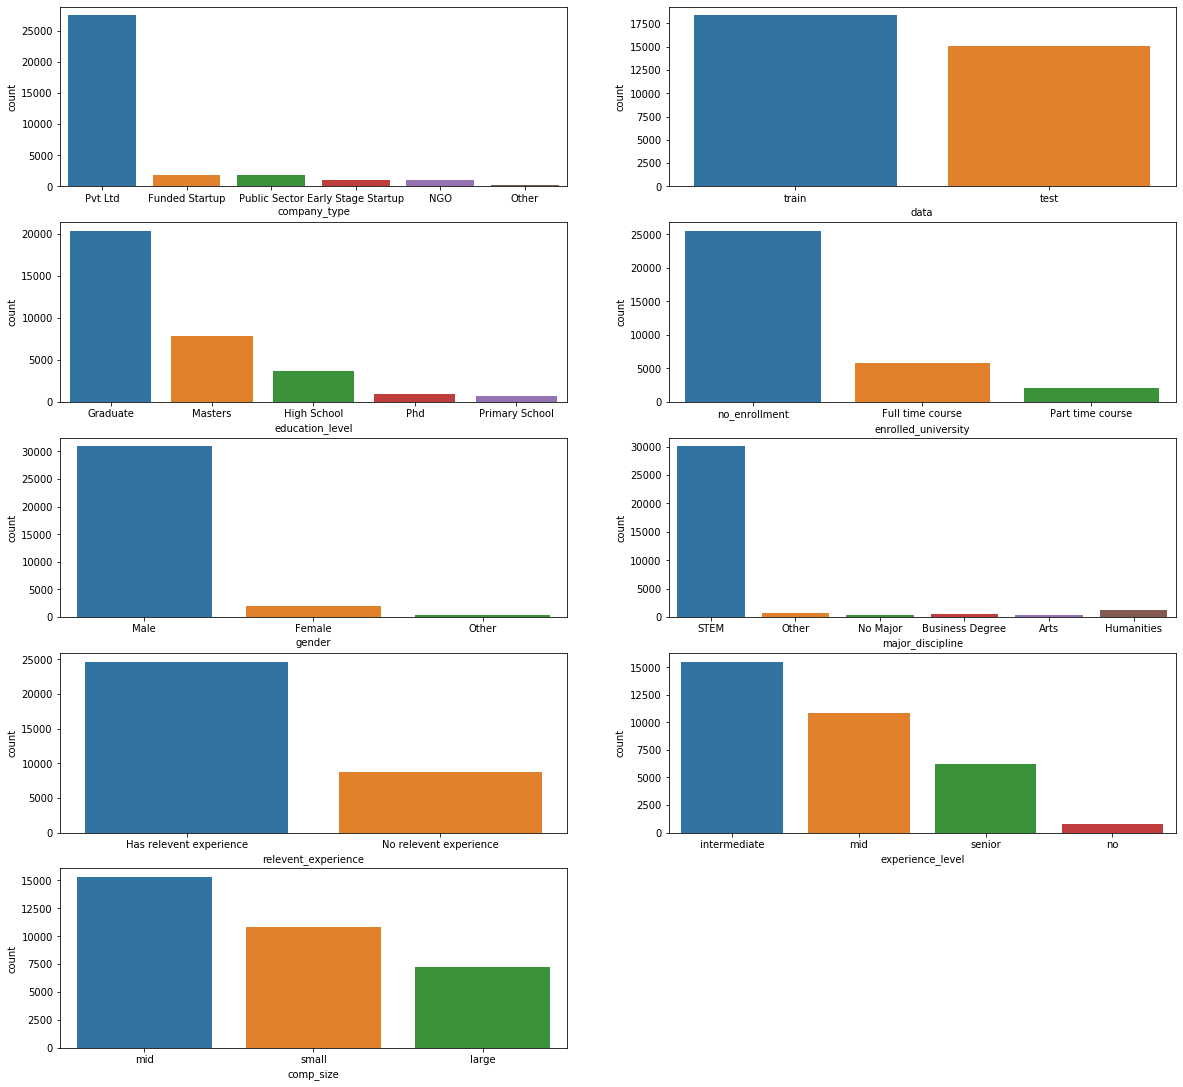

In [60]:
build_count_plot(cat_col[1:])

### Inferences:

- Most of the enrollees are currently working for a private company
- Graduation is the highest qualification/education level among the enrollees.
- A large number of candidates who registered have not yet enrolled for any University course
- some candidates have enrolled for full time course and a few of them for part time course
- Most of the enrollees are Males
- Out of all the registered candidates, most of them have relevant experience (intermediate)
- Most of them work in a mid-sized company

In [57]:
def build_hist_plot(num):
    fig = plt.figure(figsize=(15,20))
    for i in range(0,len(num)):
        fig.add_subplot(len(num),len(num)/2,i+1)
        sns.distplot(df[num[i]],kde=False)

    plt.show()

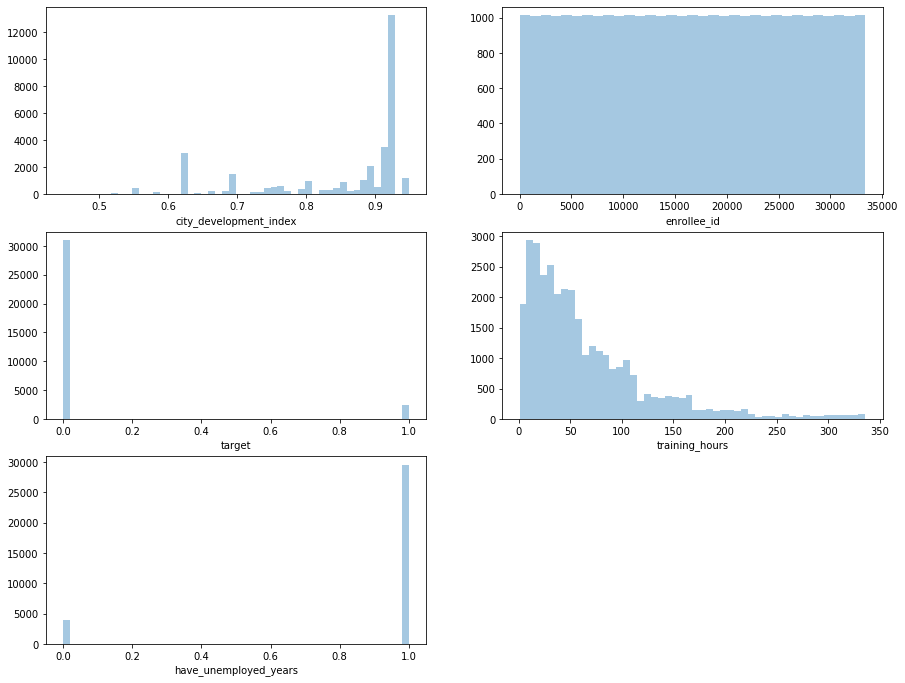

In [58]:
build_hist_plot(num_col)

## Bivariate Analysis

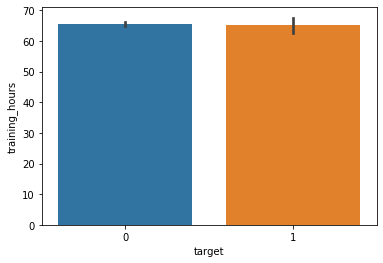

In [150]:
sns.barplot(x = df['target'], y = df['training_hours'])
plt.show()

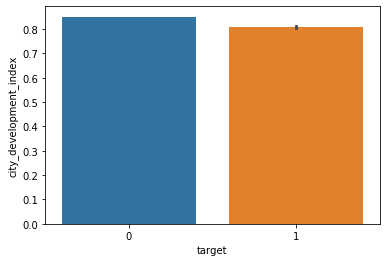

In [151]:
sns.barplot(x = df['target'], y = df['city_development_index'])
plt.show()

In [61]:
def build_count_plot1(num):
    fig = plt.figure(figsize=(25,30))
    for i in range(0,len(num)):
        fig.add_subplot(len(num),len(num)/3,i+1)
        sns.countplot(df[num[i]],hue = df['target'])
    plt.show()

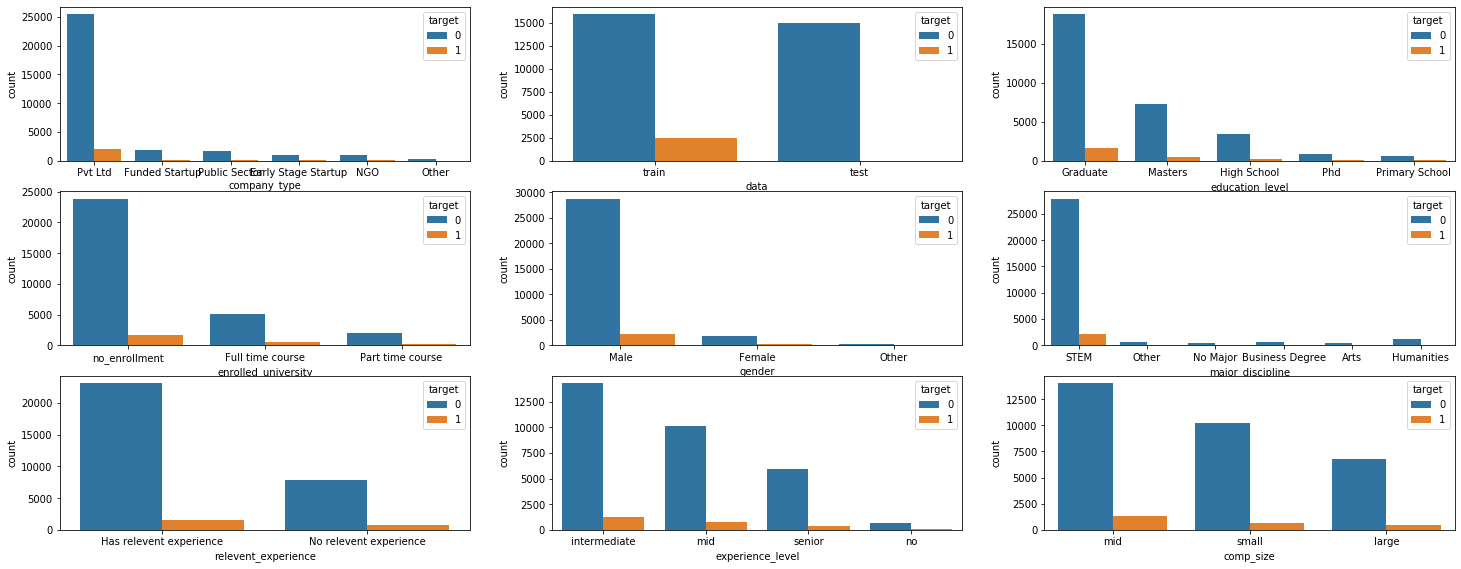

In [62]:
build_count_plot1(cat_col[1:])

### Inferences:

- the candidates looking for a job are:
    - Males who are graduated, having major discipline in STEM
    - who are not enrolled for any of the university courses
    - working for a private, mid-sized company
    - have relevant (intermediate level) experience

## Statistical Tests

#### Chi-square test applied, as the independent as well as dependent variables are categorical

In [154]:
cat_col

Index(['city', 'company_type', 'data', 'education_level',
       'enrolled_university', 'gender', 'major_discipline',
       'relevent_experience', 'experience_level', 'comp_size'],
      dtype='object')

In [155]:
pd.crosstab(df['target'],df['company_type']).values

array([[  955,  1784,   904,   204,  1640, 25468],
       [   74,    96,    69,    19,   152,  2015]], dtype=int64)

In [156]:
from scipy.stats import f_oneway,chi2_contingency,ttest_ind,mannwhitneyu

stat,p,degf,exp= chi2_contingency(pd.crosstab(df['target'],df['company_type']).values)
print(p)

0.0033487581007225252


In [157]:
stat,p,degf,exp= chi2_contingency(pd.crosstab(df['target'],df['comp_size']).values)
print(p)

5.5260689078281796e-14


In [158]:
stat,p,degf,exp= chi2_contingency(pd.crosstab(df['target'],df['education_level']).values)
print(p)

4.3173833295775184e-06


In [159]:
stat,p,degf,exp= chi2_contingency(pd.crosstab(df['target'],df['enrolled_university']).values)
print(p)

6.665057611312498e-27


In [160]:
stat,p,degf,exp= chi2_contingency(pd.crosstab(df['target'],df['gender']).values)
print(p)

0.03916125148513629


In [161]:
stat,p,degf,exp= chi2_contingency(pd.crosstab(df['target'],df['major_discipline']).values)
print(p)

0.14863324378075432


In [162]:
stat,p,degf,exp= chi2_contingency(pd.crosstab(df['target'],df['relevent_experience']).values)
print(p)

7.789440480105131e-22


In [163]:
stat,p,degf,exp= chi2_contingency(pd.crosstab(df['target'],df['experience_level']).values)
print(p)

1.285427409922797e-18


In [164]:
stat,p,degf,exp= chi2_contingency(pd.crosstab(df['target'],df['have_unemployed_years']).values)
print(p)

0.1321096860709287


### Two-sample ttest applied for some numerical independent variables

In [165]:
num_col = num_col.tolist()

In [166]:
num_col

['city_development_index',
 'enrollee_id',
 'target',
 'training_hours',
 'have_unemployed_years']

In [167]:
num_col.remove('enrollee_id')

In [168]:
num_col.remove('have_unemployed_years')

In [169]:
def ttest_ind_test(arr):
    for i in arr:
            cl0 = df[df['target']==0][i]
            cl1 = df[df['target']==1][i]
            t, p = ttest_ind(cl0,cl1)
            print(i,p)

In [170]:
ttest_ind_test(num_col)

city_development_index 1.2452028415248337e-70
target 0.0
training_hours 0.7311263447272791


## Inference:

- From the above pvalues obtained from chisqure test and two sample independent ttest it is evident that, major discipline, have_unemployed_years and training hours does not have any relationship with the target variable

In [63]:
df = df.drop(['major_discipline','have_unemployed_years','training_hours'], axis = 1)

In [64]:
df = df.drop(['city'], axis = 1)

In [65]:
df.shape

(33380, 11)

In [66]:
df.columns

Index(['city_development_index', 'company_type', 'data', 'education_level',
       'enrolled_university', 'enrollee_id', 'gender', 'relevent_experience',
       'target', 'experience_level', 'comp_size'],
      dtype='object')

## Converting categorical to numerical 

#### One-hot encoding of categorical variables

In [69]:
ndf = pd.get_dummies(df,columns=['company_type','education_level','enrolled_university', 'gender', 
                                 'relevent_experience','experience_level', 'comp_size'],
                     prefix=['CT','EL','EU','G','RE','EL','CS'],drop_first=True)

In [70]:
ndf.shape

(33380, 23)

In [71]:
ndf.head()

,city_development_index,data,enrollee_id,target,CT_Funded Startup,CT_NGO,CT_Other,CT_Public Sector,CT_Pvt Ltd,EL_High School,...,EU_Part time course,EU_no_enrollment,G_Male,G_Other,RE_No relevent experience,EL_mid,EL_no,EL_senior,CS_mid,CS_small
0,0.689,train,23798,0,0,0,0,0,1,0,...,0,1,1,0,0,0,0,0,1,0
1,0.923,train,29166,0,1,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
2,0.910,train,46,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
3,0.666,train,18527,0,0,0,0,0,1,0,...,0,1,1,0,0,1,0,0,0,1
4,0.887,train,21751,1,0,0,0,0,1,0,...,0,1,1,0,1,0,0,0,1,0


## Finally, Separating the train and validation data for modelling

In [72]:
train_df = ndf[ndf['data']=='train']

In [74]:
train_df.columns

Index(['city_development_index', 'data', 'enrollee_id', 'target',
       'CT_Funded Startup', 'CT_NGO', 'CT_Other', 'CT_Public Sector',
       'CT_Pvt Ltd', 'EL_High School', 'EL_Masters', 'EL_Phd',
       'EL_Primary School', 'EU_Part time course', 'EU_no_enrollment',
       'G_Male', 'G_Other', 'RE_No relevent experience', 'EL_mid', 'EL_no',
       'EL_senior', 'CS_mid', 'CS_small'],
      dtype='object')

In [76]:
train_df = train_df.drop(['data','enrollee_id'], axis = 1)

In [77]:
test_df = ndf[ndf['data']=='test']

In [79]:
test_df.columns

Index(['city_development_index', 'data', 'enrollee_id', 'target',
       'CT_Funded Startup', 'CT_NGO', 'CT_Other', 'CT_Public Sector',
       'CT_Pvt Ltd', 'EL_High School', 'EL_Masters', 'EL_Phd',
       'EL_Primary School', 'EU_Part time course', 'EU_no_enrollment',
       'G_Male', 'G_Other', 'RE_No relevent experience', 'EL_mid', 'EL_no',
       'EL_senior', 'CS_mid', 'CS_small'],
      dtype='object')

In [81]:
test_df = test_df.drop(['data','enrollee_id','target'], axis = 1)

In [84]:
train_df.head()

,city_development_index,target,CT_Funded Startup,CT_NGO,CT_Other,CT_Public Sector,CT_Pvt Ltd,EL_High School,EL_Masters,EL_Phd,...,EU_Part time course,EU_no_enrollment,G_Male,G_Other,RE_No relevent experience,EL_mid,EL_no,EL_senior,CS_mid,CS_small
0,0.689,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,0,0,0,1,0
1,0.923,0,1,0,0,0,0,0,0,0,...,0,1,1,0,0,1,0,0,0,1
2,0.910,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1
3,0.666,0,0,0,0,0,1,0,0,0,...,0,1,1,0,0,1,0,0,0,1
4,0.887,1,0,0,0,0,1,0,1,0,...,0,1,1,0,1,0,0,0,1,0


### Saving the data for further use

In [87]:
train_df.to_csv('E:/Data Science/Competitions/data/JantaHack_HR_Analytics/final_train.csv', index = False)

In [88]:
test_df.to_csv('E:/Data Science/Competitions/data/JantaHack_HR_Analytics/final_test.csv', index = False)